In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
try: 
    from sklearn.utils import safe_indexing
except:
    from sklearn.utils import _safe_indexing

from yellowbrick.classifier import discrimination_threshold
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
model = LogisticRegression()
visualizer = ClassificationReport(model)

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
train_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
train_df['pregame_eFG_difference'] = train_df['home_pregame_eFG'] - train_df['away_pregame_eFG']
train_df['pregame_eFGa_difference'] = train_df['home_pregame_eFG_allowed'] - train_df['away_pregame_eFG_allowed']
train_df['pregame_win_difference'] = train_df['home_pregame_win_percentage'] - train_df['away_pregame_win_percentage']
train_df['pregame_rebs_difference'] = train_df['home_pregame_rebound_percentage'] - train_df['away_pregame_rebound_percentage']

test_df['pregame_eFG_difference'] = test_df['home_pregame_eFG'] - test_df['away_pregame_eFG']
test_df['pregame_eFGa_difference'] = test_df['home_pregame_eFG_allowed'] - test_df['away_pregame_eFG_allowed']
test_df['pregame_win_difference'] = test_df['home_pregame_win_percentage'] - test_df['away_pregame_win_percentage']
test_df['pregame_rebs_difference'] = test_df['home_pregame_rebound_percentage'] - test_df['away_pregame_rebound_percentage']

In [4]:
# Create separate dataframes for the features and target variable so we can train the model
x_train = train_df.iloc[:,1:]
y_train = train_df['Home_Win'].values.reshape(-1,1)

#This will be used to test our performance
x_test = test_df.iloc[:,1:]
y_test = test_df['Home_Win'].values.reshape(-1,1)


In [20]:
x_train.head()

,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,month_December,month_February,month_January,month_March,month_November,pregame_eFG_difference,pregame_eFGa_difference,pregame_win_difference,pregame_rebs_difference
0,0.533333,0.474747,0.462644,0.666667,0.546000,0.527273,0.427386,1.000000,0,0,0,0,1,0.012667,-0.035258,0.333333,0.052525
1,0.557927,0.518621,0.459565,0.818182,0.557072,0.526846,0.502378,0.714286,1,0,0,0,0,-0.000855,0.042814,-0.103896,0.008225
2,0.541306,0.515098,0.473576,0.730769,0.539457,0.524355,0.464958,0.923077,0,1,0,0,0,-0.001849,-0.008618,0.192308,0.009258
3,0.546021,0.521249,0.466043,0.777778,0.536078,0.492695,0.538396,0.368421,0,0,1,0,0,-0.009943,0.072353,-0.409357,-0.028554
4,0.537612,0.519357,0.467428,0.761905,0.542275,0.579537,0.451074,0.772727,0,1,0,0,0,0.004663,-0.016354,0.010823,0.060180


In [5]:
x_train.drop(x_train.columns.difference(['pregame_eFG_difference','pregame_eFGa_difference', 'pregame_rebs_difference', 'pregame_win_difference']), 1, inplace=True)


In [6]:
x_test.drop(x_test.columns.difference(['pregame_eFG_difference','pregame_eFGa_difference', 'pregame_rebs_difference', 'pregame_win_difference']), 1, inplace=True)

In [23]:
x_train.head()

,month_December,month_February,month_January,month_March,month_November,pregame_eFG_difference,pregame_eFGa_difference,pregame_win_difference,pregame_rebs_difference
0,0,0,0,0,1,0.012667,-0.035258,0.333333,0.052525
1,1,0,0,0,0,-0.000855,0.042814,-0.103896,0.008225
2,0,1,0,0,0,-0.001849,-0.008618,0.192308,0.009258
3,0,0,1,0,0,-0.009943,0.072353,-0.409357,-0.028554
4,0,1,0,0,0,0.004663,-0.016354,0.010823,0.060180


In [8]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
features= ['pregame_eFG_difference', 'pregame_eFGa_difference', 'pregame_win_difference', 'pregame_rebs_difference']
#holdout features: 'away_pregame_eFG', 'away_pregame_rebound_percentage', 'away_pregame_eFG_allowed', 'away_pregame_win_percentage','home_pregame_eFG', 'home_pregame_rebound_percentage', 'home_pregame_eFG_allowed', 'home_pregame_win_percentage',  
# Apply transformations to the features we need to normalize on a (-1, 1) scale. Makes the model faster
x_train[features]= ss.fit_transform(x_train[features])
#x_test[features]= ss.fit_transform(x_test[features])

In [9]:
x_train[features].describe()

,pregame_eFG_difference,pregame_eFGa_difference,pregame_win_difference,pregame_rebs_difference
count,8.397000e+03,8.397000e+03,8.397000e+03,8.397000e+03
mean,2.549798e-17,8.118101e-18,4.990318e-16,-7.192585e-18
std,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00
min,-8.116536e+00,-8.484749e+00,-4.095675e+00,-5.730901e+00
25%,-5.934935e-01,-5.617322e-01,-5.981817e-01,-5.896758e-01
50%,-2.568475e-02,4.055224e-02,-6.129941e-02,-1.617846e-02
75%,5.537147e-01,5.950959e-01,6.057173e-01,5.852497e-01
max,8.956854e+00,6.666957e+00,3.327576e+00,7.717055e+00


In [19]:
model = LogisticRegression()
model.fit(x_train, y_train.ravel())

LogisticRegression()

In [11]:
from sklearn.metrics import confusion_matrix
trainproba = model.predict_proba(x_train)
trainpred = model.predict(x_train)

cm = confusion_matrix(y_train, trainpred)
print(cm)

[[   0 3006]
 [   0 5391]]


In [ ]:
trainproba = model.predict_log_proba(x_train)
cm = confusion_matrix(y_train, trainproba)
print(cm)

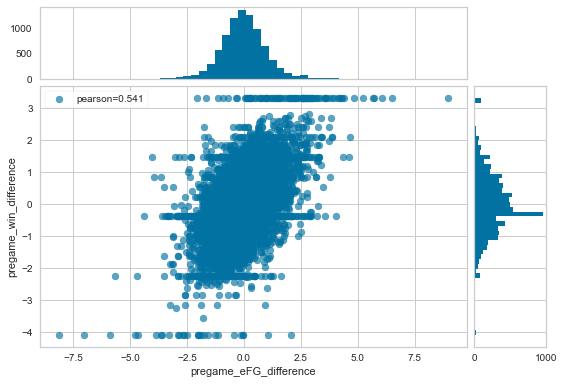

<AxesSubplot:xlabel='pregame_eFG_difference', ylabel='pregame_win_difference'>

In [13]:
from yellowbrick.features import Rank2D, JointPlotVisualizer
visualizer = JointPlotVisualizer(columns=['pregame_eFG_difference', 'pregame_win_difference'])
visualizer.fit_transform(x_train, y_train)
visualizer.show()

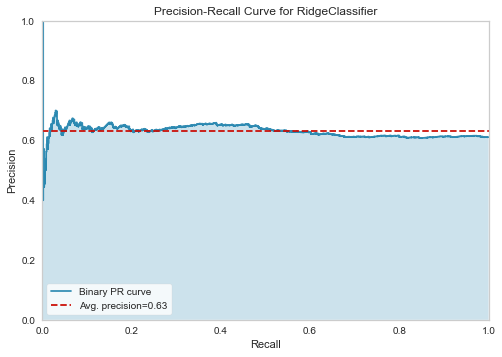

<AxesSubplot:title={'center':'Precision-Recall Curve for RidgeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [29]:

from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts

visualizer = PrecisionRecallCurve(RidgeClassifier(random_state=0))
visualizer.fit(x_train, y_train.ravel())
visualizer.score(x_test, y_test.ravel())
visualizer.show()

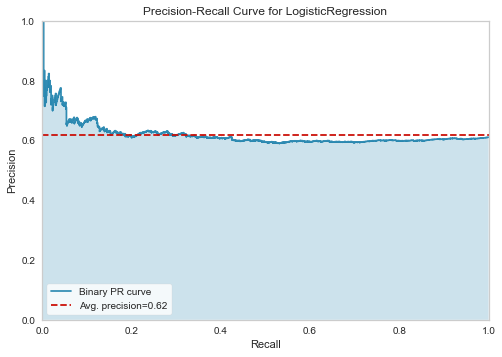

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [14]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve

visualizer = PrecisionRecallCurve(LogisticRegression())
visualizer.fit(x_train, y_train.ravel())
visualizer.score(x_test, y_test.ravel())
visualizer.show()

In [15]:
train_df['Home_Win'].value_counts()

# Home wins are 5391 and losses are 3006. 8397 total samples.
# weight of wins columns is 0.77 (samples divided by (2*number of wins))
# weight of loss column is 1.396

weights = {0:1.3967, 1:.77879}



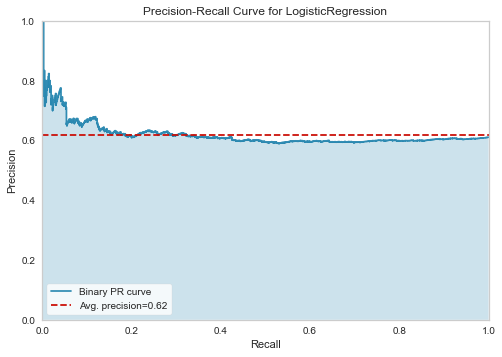

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [16]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve

visualizer = PrecisionRecallCurve(LogisticRegression(class_weight=weights, random_state=0))
visualizer.fit(x_train, y_train.ravel())
visualizer.score(x_test, y_test.ravel())
visualizer.show()

C:\Users\mason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


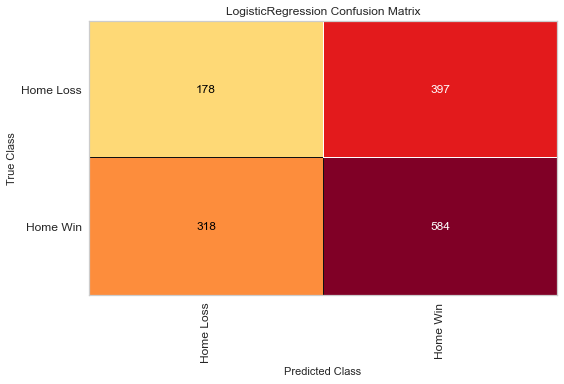

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [17]:
from yellowbrick.classifier import ConfusionMatrix

model = LogisticRegression(class_weight=weights, random_state=0)
cm = ConfusionMatrix(model, classes=['Home Loss', 'Home Win'])

cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

# The model predicted 546 wins for the home team and 931 losses.
#   It's likely overcompensating for weight that I put in
# It was fairly precise (65% of its predicted wins were, in fact, wins - True Positives)
# It fell apart on the losses (58% of its predicted losses ended up being wins - False Negatives)

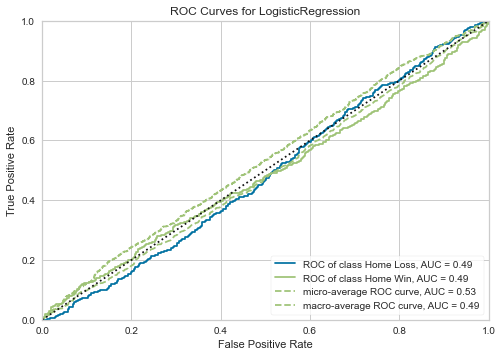

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [18]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=["Home Loss", "Home Win"])

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

# We are playing with very thin margins here. Ideally you want a high true positive and low false positive (almost a right angle)

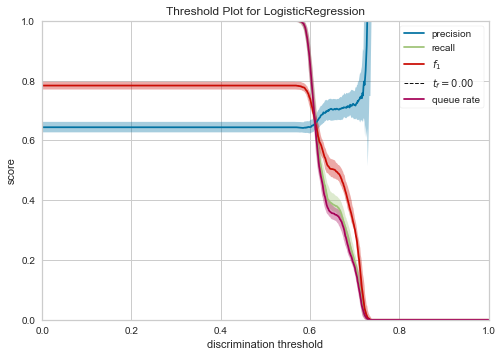

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [40]:
from yellowbrick.classifier import DiscriminationThreshold

# Load a binary classification dataset

# Instantiate the classification model and visualizer
model = LogisticRegression()
visualizer = DiscriminationThreshold(model)

visualizer.fit(x_train, y_train.ravel())        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

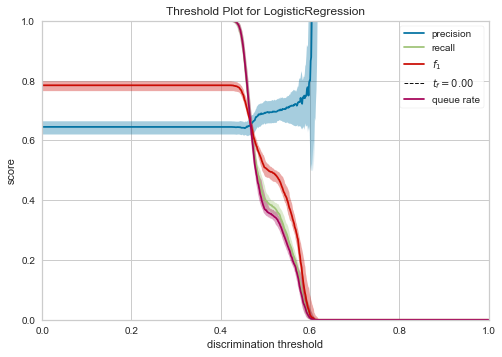

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [41]:
from yellowbrick.classifier import DiscriminationThreshold

# Load a binary classification dataset

# Instantiate the classification model and visualizer
model = LogisticRegression(class_weight=weights)
visualizer = DiscriminationThreshold(model)

visualizer.fit(x_train, y_train.ravel())        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

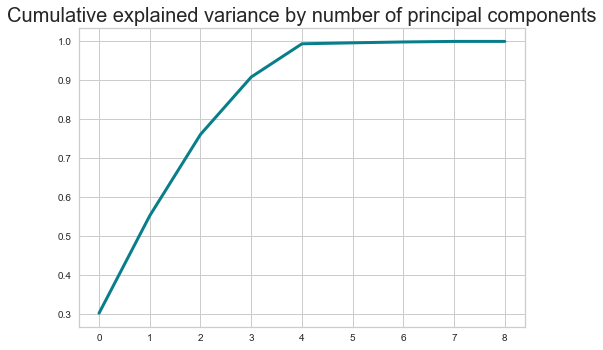

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(x_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

# This tells us that 100% of the variance in our model can be explained by just 4 features

In [44]:

loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x_train.columns) + 1)],
    index=x_train.columns
)
loadings.head(10)

# Each PC in this output is a step along the x axis. So PC1 handles 55% of our variance in the dataset
# within PC1, Month_January is .38 correlated with PC1 and Feb is negatively correlated at .33
# PC2, 

# this is sketchy. The model is basically basing its entire output on month by month correlations of win percentage

# I bet that if I removed all the stats, the model would be the same


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
month_December,-0.019511,0.241111,-0.287053,-0.093925,0.016467,-5.131382e-05,-0.000053,-0.000035,1.462777e-15
month_February,-0.339101,-0.267177,-0.017999,-0.060636,-0.004264,-1.393160e-04,0.000084,0.000050,1.462777e-15
month_January,0.382136,-0.214530,-0.016289,-0.058845,-0.008126,-2.026184e-07,-0.000006,0.000041,1.462777e-15
month_March,-0.006183,0.046918,0.009533,0.315887,-0.020891,-4.971923e-05,0.000092,0.000043,1.462777e-15
month_November,-0.017342,0.193678,0.311808,-0.102481,0.016814,2.405517e-04,-0.000117,-0.000099,1.462777e-15
pregame_eFG_difference,-0.000942,0.004068,-0.000341,-0.004113,-0.028129,2.695889e-02,0.030688,0.014019,1.259640e-30
pregame_eFGa_difference,0.000156,-0.005831,-0.002058,0.004649,0.029205,3.116315e-02,-0.005509,-0.025212,-2.910789e-30
pregame_win_difference,-0.007975,0.032943,0.001682,-0.033097,-0.265123,2.741882e-03,-0.006921,-0.002302,-9.078483e-32
pregame_rebs_difference,0.000090,0.004119,0.001087,-0.003950,-0.026865,-2.122771e-02,0.029991,-0.019507,-1.699379e-30


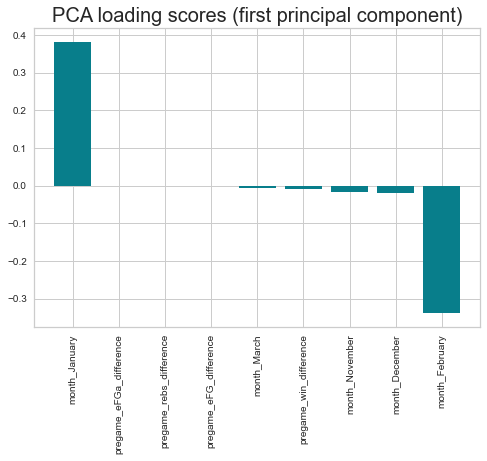

In [45]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [47]:
x_train.describe()

,month_December,month_February,month_January,month_March,month_November,pregame_eFG_difference,pregame_eFGa_difference,pregame_win_difference,pregame_rebs_difference
count,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000
mean,0.183756,0.255806,0.267238,0.115994,0.177206,0.012321,-0.012831,0.103472,0.012935
std,0.387308,0.436339,0.442544,0.320237,0.381866,0.051873,0.050497,0.269440,0.049861
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.408681,-0.441259,-1.000000,-0.272796
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.018464,-0.041195,-0.057692,-0.016465
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.010988,-0.010783,0.086957,0.012128
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.041041,0.017218,0.266667,0.042114
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.476909,0.323810,1.000000,0.397692


In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight=weights)
model.fit(x_train, y_train.ravel())
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

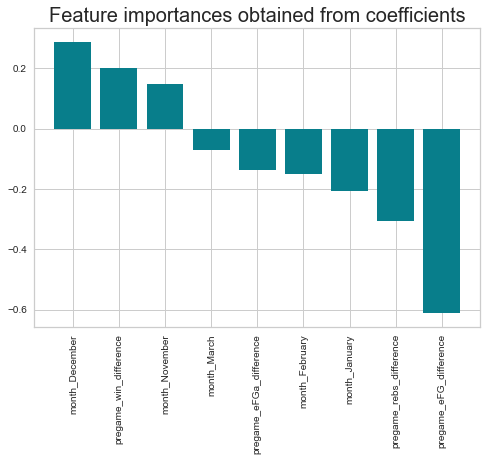

In [52]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
testproba = model.predict_proba(x_test)
probability_df = pd.DataFrame(testproba, columns=['Home_Loss', 'Home_Win'])

probability_df.describe()

,Home_Loss,Home_Win
count,1477.000000,1477.000000
mean,0.356571,0.643429
std,0.003703,0.003703
min,0.342917,0.627771
25%,0.354345,0.641331
50%,0.356691,0.643309
75%,0.358669,0.645655
max,0.372229,0.657083
